# Άσκηση 1

Για τον απλό τυχαίο περίπατο, μέχρι αυτός να βγει από το $[-70, 100]$ προσομοιώστε:

* 500 διαδρομές με τάση προς τα αριστερά $p(k, k+1) = \frac{1}{5}, p(k,k-1) = \frac{4}{5}$
* 500 διαδρομές με τάση προς τα δεξιά $p(k, k+1) = \frac{4}{5}, p(k,k-1) = \frac{1}{5}$

### Ερώτηση 1:

* Σχεδιάστε τις 1000 διαδρομές σε ένα γράφημα χρόνου-θέσης.
* Αυτές που έχουν τάση προς τα αριστερά με κόκκινο χρώμα και αυτές που έχουν τάση προς τα δεξιά με μπλέ 
* Σχολιάστε το αποτέλεσμα

### Ερώτηση 2:

* Σχεδιάστε το ιστόγραμμα των χρόνων εξόδου για τις δύο περιπτώσεις σε ένα κοινό γράφημα.
* Το ιστόγραμμα που αντιστοιχεί στην αλυσίδα με τάση δεξιά να είναι μπλέ και το άλλο κόκκινο (όπως πριν)

In [1]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

# random walk generator:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

## Ερώτηση 1

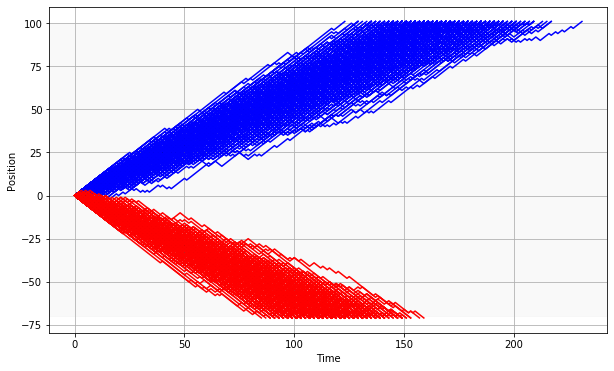

In [2]:
fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary

for i in range(500):
    walker = rand_walk_Z(probs = (.2,.8))  # start new symmetric walk from 0
    x = 0  # start position 0
    chain = [x]  # save positions to plot
    while a <= x <= b:
        x = next(walker)
        chain.append(x)
    ax.plot(chain, color='b')

for i in range(500):
    walker = rand_walk_Z(probs = (.8,.2))  # start new symmetric walk from 0
    x = 0  # start position 0
    chain = [x]  # save positions to plot
    while a <= x <= b:
        x = next(walker)
        chain.append(x)
    ax.plot(chain, color='r')


# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.1)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

Παρατηρούμε ότι στην περίπτωση των αλυσίδων με "διάθεση" κίνησης θετικά οι αριθμοί βημάτων που απαιτούνται για να ξεφύγει η αλυσίδα είναι περισσότεροι από τις αλυσίδες προς τα 

## Ερώτηση 2


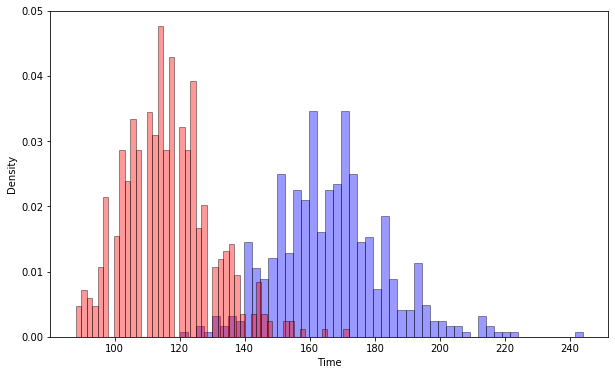

In [3]:
r = 20  # radius of circle boundary

N = 500  # sample size
escape_time1 = np.zeros(N, dtype=int)  # to store the exit time
for n in range(N):
    walker = rand_walk_Z(probs = (.2,.8))
    x = 0
    t = 0
    while x < 100 and x>-70:
        x = next(walker)
        t += 1
    escape_time1[n] = t

escape_time2 = np.zeros(N, dtype=int)  # to store the exit time
for n in range(N):
    walker = rand_walk_Z(probs = (.8,.2))
    x = 0
    t = 0
    while x < 100 and x>-70:
        x = next(walker)
        t += 1
    escape_time2[n] = t
    
plt.hist(escape_time1,color = 'b', bins=50, edgecolor='black', density = True , alpha = .4)
plt.hist(escape_time2,color = 'r', bins=50, edgecolor='black', density = True , alpha = .4)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

Όπως και προηγουμένος βλέπουμε ότι ο χρόνος των δεξία αλυσίδων είναι μεγαλύτερος εν γένει των αριστερά. Πάλι αυτό εξηγείται λόγω του ότι η το δεξί φράγμα είναι 100 βήματα ενώ το αριστερό 70 .

# Άσκηση 2:

Δημιουργήστε μία αλυσίδα που να κινείται στον $\mathbb{Z}_+$ με πιθανότητες μετάβασης:

* Για $k > 0$: $p(k, k+1) = \frac{1}{3}$ και $p(k, k-1) = \frac{2}{3}$
* Για $k = 0$: $p(0, 1) = \frac{1}{3}$ και $p(0, 0) = \frac{2}{3}$

Προσομοιώστε την αλυσίδα `1000` φορές.

### Ερώτηση 1:

Σχεδιάστε το ιστόγραμμα της θέσης $x_{100}$ όπου βρίσκεται η αλυσίδα μετά το εκατοστό βήμα της.

### Ερώτηση 2:

Έστω:

$$ M_n = \max_{0\le k\le n} X_k$$

η δεξιότερη θέση που φτάνει η αλυσίδα στα $n$ πρώτα της βήματα.

1. Κάντε ιστόγραμμα της κατανομής της $M_{1000}$
2. Υπολογίστε τη δειγματική μέση τιμή και διασπορά της

In [4]:
def new_rand_walk_Z(start = 0, probs = (2/3, 1/3)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        if x == 0:
          x += choice([0,1], p=probs)
        else:
          x += choice(steps, p=probs)
        yield x  # it's a generator!

## Ερώτηση 1


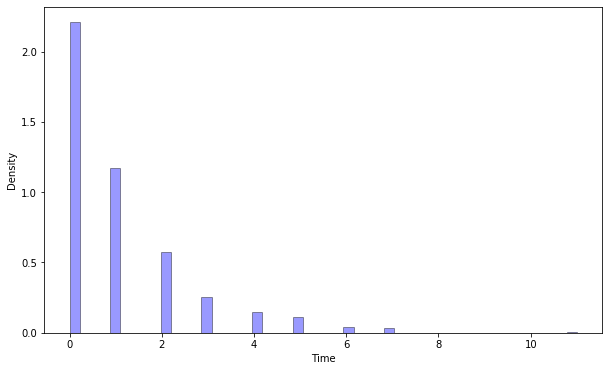

In [5]:
fig, ax = plt.subplots()  # initiate plots

Positions = np.zeros(1000, dtype=int)  # to store the exit time
for n in range(1000):
    walker = new_rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    for i in range(100):
        x = next(walker)
    Positions[n] = x

plt.hist(Positions,color = 'b', bins=50, edgecolor='black', density = True , alpha = .4)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

Παρατηρούμε ότι η αλυσίδα δυσκολεύεται να ξεφύγει από την θέση 0. 


## Ερώτηση 2

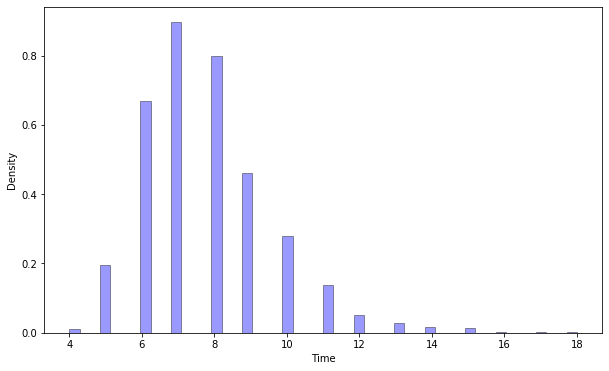

In [6]:
import statistics as stat ## import the library statistics. We will use it to compute the mean and variance of our list

fig, ax = plt.subplots()  # initiate plots

maxPositions = np.zeros(1000, dtype=int)  # to store the exit time
for n in range(1000):
    walker = new_rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    M = 0
    for i in range(1000):
        x = next(walker)
        M = max(x,M)
    maxPositions[n] = M

plt.hist(maxPositions,color = 'b', bins=50, edgecolor='black', density = True , alpha = .4)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()



Παρατηρούμε ότι η αλυσίδα καταφέρνει να προχωρήσει σε έναν σημαντικό αριθμό θέσεων για τουλάχιστον μία φορά. Και πάλι βέβαια οι τιμές είναι πολύ μικρές, λόγω του ότι η πιθανότητα μετάβασης προς τα αρνητικά είναι σημαντικά μεγαλύτερη της πιθανότητας μετάβασης προς τα θετικά

In [7]:
import statistics as stat ## import the library statistics. We will use it to compute the mean and variance of our list

print(stat.mean(maxPositions), stat.variance(maxPositions))

7 3


Η μέση τιμή είναι 7 και διασπορά 3. 

# Άσκηση 3

Για τον τυχαίο περίπατο στο $\mathbb{Z}^2$

Προσομοιώστε 500 αλυσίδες και υπολογίστε το μέσο χρόνο που κάνει μια αλυσίδα για να βγει από τον δίσκο ακτίνας:

$$ R = 10, 20, ..., 100 $$

* Φτιάξτε ένα διάγραμμα $R$ - χρόνου εξόδου σε λογαριθμική κλίμακα.
* Σχολιάστε τη σχέση των 2 μεταβλητών

Στη συγκεριμένη άσκηση εκτός από μικρότερο αριθμό δειγμάτων είναι καλό να δοκιμάσετε τον κώδικα σας και για μικρά (~50) R στην αρχή καθώς η αλυσίδα μπορεί να χρειαστεί αρκετό χρόνο να ξεφύγει για μεγάλα R.

In [8]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

mean = []        
for i in range (1,11):
  r = 10*i  # radius of circle boundary
  r2 = r**2  # square of radius

  N = 500  # sample size
    # to store the exit time
  sum = 0
  for n in range(N):
      walker = rand_walk_Z2()
      x, y = (0, 0)
      t = 0
      while x**2 + y**2 < r2:
          x, y = next(walker)
          t += 1
      sum += t
  mean.append(sum/500)

In [10]:
print(mean)

[104.518, 407.536, 889.542, 1636.35, 2474.216, 3679.374, 4919.246, 6463.796, 7830.828, 9838.526]


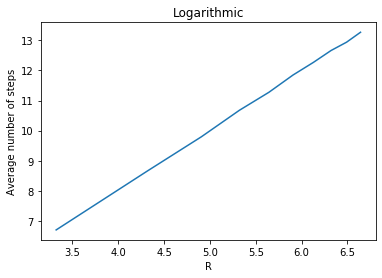

In [19]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

x = list(range(10, 110,10))

newx = np.log2(x)
newmean = np.log2(mean)

plt.figure(2)
plt.plot(newx, newmean)
plt.xlabel('R')
plt.ylabel('Average number of steps')
plt.title('Logarithmic')
plt.show()

Παρατηρούμε ότι η σχέση των δύο μετρούμενων στοιχείων είναι γραμμική σε λογαριθμική κλίμακα και άρα η πραγματική μεταξύ τους σχέση είναι εκθετική. 